## Application of Estimation Tools
### Submitted by: Junaid Ramzan Bhat
### Submitted to:  Prof. Devaux Fabrice

#### Important Note : Please run the jupyter cells in order for the code to function properly.

#### Introduction
In this practical we simulate a poll to check our hypothesis regarding the popularity of a political figure namely Mr. Dupont and try to deduce information from the results of our simulation. Our null hypothesis is that the popularity of Mr.Dupont is around 50% and we simulate two different results based on varying poll size and compare the results in both cases to either accept or reject our null hypothesis. In the second part of the practical, we try to determine the uncertainty in the statistical variables like mean of a statistical data, in order to comment on the randomness of the mean measurements.

### 1.1.1
Using an appropriate random number generator, build a program generating
a sequence of 1000 random numbers with two possible equally probable 
values: 0 and 1 corresponding respectively to the answer given to the poll 
question, “Would you vote for Mr. Dupont?”: NO (0), YES (1). How many 1 
are obtained?

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Random generation of votes
np.random.seed(7)
votes = np.random.randint(0, 2, 1000)
count_yes = np.sum(votes)

print("Number of YES votes obtained:", count_yes)



Number of YES votes obtained: 495


## 1.1.2
Repeat at least 500 times this generation and plot the histogram* of the
results. Do not forget the label of the axes and the title of the figure

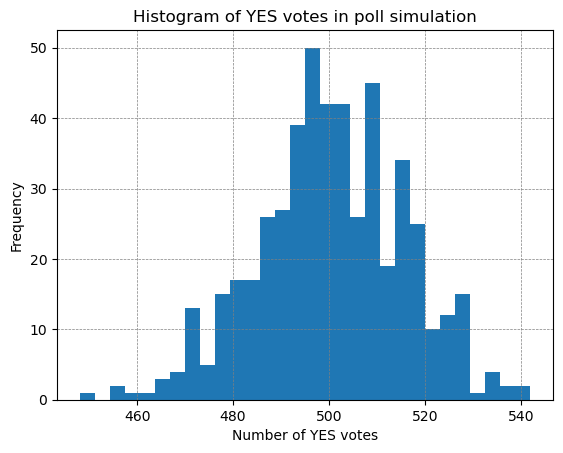

In [64]:
num_sims = 500        # Number of times the survey is repeated
results = []          # array to store in the votes in favour

# Function to generate votes for 500 surveys
for i in range(num_sims):
  np.random.seed(i)
  votes = np.random.randint(0, 2, 1000)
  count_yes = np.sum(votes)
  results.append(count_yes)

# Plotting the results
plt.hist(results, bins = 30)
plt.xlabel("Number of YES votes")
plt.ylabel("Frequency")
plt.title("Histogram of YES votes in poll simulation")
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

## 1.1.3
Order the results (use the SORT function) and plot the cumulative 
probability function of the 500 polls in order to find a confidence interval at 
95% for the results. Conclusion? 

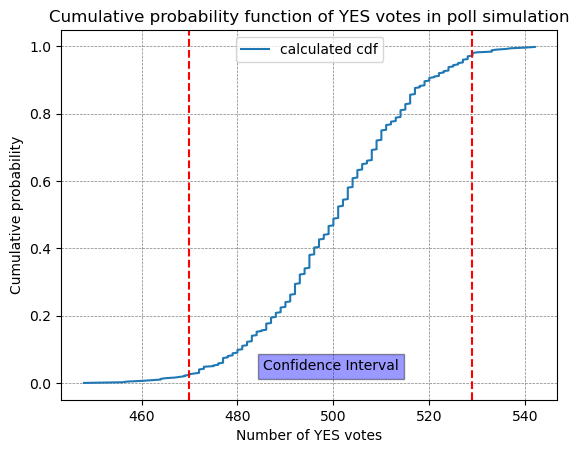

95% Confidence Interval: (470.0, 529.0)


In [65]:
results.sort()

#Function to generate the cumulative probabilities
cumulative_probabilities = []
for i, result in enumerate(results):
  cumulative_probabilities.append(float(i) / float(num_sims))

# Graphical(Calculated) 95% confidence interval calculation
lower_bound = np.percentile(results, 2.5)
upper_bound = np.percentile(results, 97.5)

#Plot the cumulative Probability Function
plt.plot(results, cumulative_probabilities, label = "calculated cdf")
plt.axvline(lower_bound ,ymin=0, ymax=1, linestyle= '--', color = 'red')
plt.axvline(upper_bound, ymin=0, ymax=1, linestyle='--', color ="red")
plt.xlabel("Number of YES votes")
plt.ylabel("Cumulative probability")
plt.title("Cumulative probability function of YES votes in poll simulation")
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend(loc="upper center")

confidence_interval_text = f"Confidence Interval"
plt.text((lower_bound + upper_bound) / 2, 0.05, confidence_interval_text,
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='blue', alpha=0.4))
plt.show()

print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")



In this case, the confidence interval is 470 to 529, which means that there is a 95% chance that the true population proportion of people who support the Mr.Dupont is between 47% and 52.9%.

If Mr. Dupont's popularity had truly fallen from 52% to 48%, then we would expect to see a confidence interval that is entirely below 52%. The confidence interval includes 50% but also 52%  which suggests that the data is not statistically significant, and that the observed change in popularity could be due to chance.  Therefore, the calculated data cannot be used to support the hypothesis that his true popularity is around 50% as the confidence interval includes 52%.

## 1.1.4 
Compare with the theoretical result (see the exercises on estimation), are 
the results coherent? 

In [66]:
N = 1000        # Number of trails, in this case the pool of people
p =  0.5        # Probability of success i.e votes in favour

mean = N*p      # Mean of a binomial trial
std = np.sqrt(N * p * (1 - p))         # Standard deviation of a binomial trial

#Theoritical 95% confidence interval
lower_bound = mean - 2*std
upper_bound = mean + 2*std
confidence_int = [int(lower_bound), int(upper_bound)]

print(f"mean = {mean}, standard deviation ={std}")
print(f"theoritical confidence interval is ={confidence_int}")

mean = 500.0, standard deviation =15.811388300841896
theoritical confidence interval is =[468, 531]


The theoritical confidence interval is [468, 531]. Again the confidence interval includes 52%, which suggests that the change in popularity could be due to random chance, hence the hypothesis can't be supported with the theoritical data as well, so both the results are coherent.

## 1.1.5 
Repeat all the steps for a poll conducted on 4000 people. What conclusion
do you draw about the accuracy of a poll?

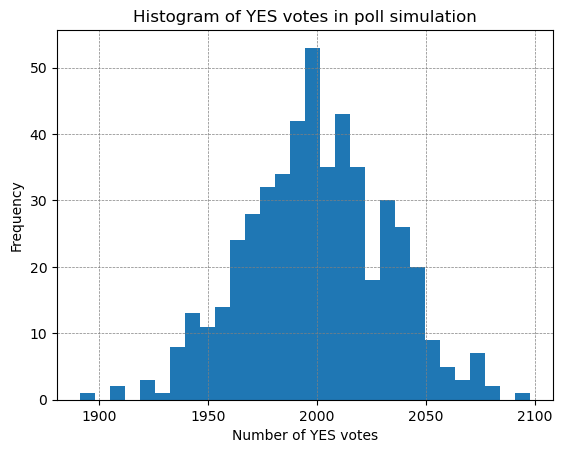

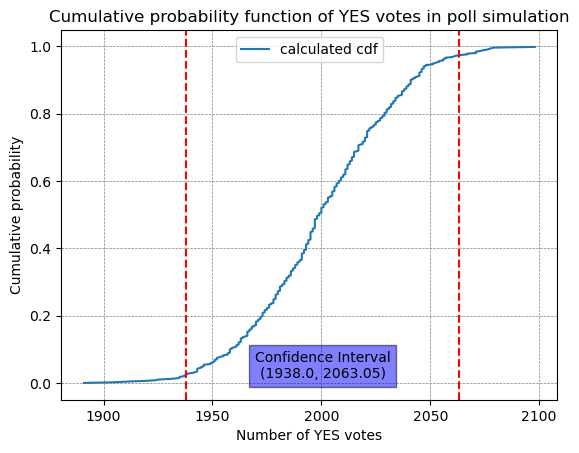

95% Confidence Interval: (1938.0, 2063.05)
mean = 2000.0, standard deviation =31.622776601683793
theoritical confidence interval is =[1936, 2063]


In [67]:
import numpy as np
import matplotlib.pyplot as plt

num_sims = 500        # Number of times the survey is repeated
results = []          # Array to store the results

# Function to generate the results
for i in range(num_sims):
  np.random.seed(i)
  votes = np.random.randint(0, 2, 4000)   # here, by changing the last parameter, we can get more statistically significant results
  count_yes = np.sum(votes)
  results.append(count_yes)

# Plot the result
plt.hist(results, bins = 30)
plt.xlabel("Number of YES votes")
plt.ylabel("Frequency")
plt.title("Histogram of YES votes in poll simulation")
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.show()

"""
Part II: To plot the cumulative probability distribution and determine the calculated 95% Confidence interval
"""

results.sort()

# Function to generate the cumulative probability 
cumulative_probabilities = []
for i, result in enumerate(results):
  cumulative_probabilities.append(float(i) / float(num_sims))

# Calculated 95% confidence interval
lower_bound = np.percentile(results, 2.5)
upper_bound = np.percentile(results, 97.5)

# Plot the cumulative probability distribution
plt.plot(results, cumulative_probabilities, label = "calculated cdf")
plt.axvline(lower_bound ,ymin=0, ymax=1, linestyle= '--', color = 'red')
plt.axvline(upper_bound, ymin=0, ymax=1, linestyle='--', color ="red")
plt.xlabel("Number of YES votes")
plt.ylabel("Cumulative probability")
plt.title("Cumulative probability function of YES votes in poll simulation")
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend(loc = "upper center")

# Adding the text box for confidence interval
confidence_interval_text = f"Confidence Interval\n({lower_bound}, {upper_bound})"
plt.text((lower_bound + upper_bound) / 2, 0.05, confidence_interval_text,
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='blue', alpha=0.5))
plt.show()

print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

"""
Part III: To calculate the theoritical confidence interval assuming a binomial distribution
"""
N = 4000        # Number of trails, in this case the pool of people
p =  0.5        # Probability of success i.e votes in favour

# Mean and standard deviation of the binomial distribution
mean = N*p
std = np.sqrt(N * p * (1 - p))

# Theoritical 95% confidence interval calcualtion
lower_bound = mean - 2*std
upper_bound = mean + 2*std
confidence_int = [int(lower_bound), int(upper_bound)]

print(f"mean = {mean}, standard deviation ={std}")
print(f"theoritical confidence interval is ={confidence_int}")


In this case, the confidence interval lies between 1938 and 2063 which means that there is a 95% chance that the true population proportion of people who support the political personality is between 48.45% and 51.57%.

We see here that the confidence interval has fallen entirely below the 52% mark but includes the 50% value, so we can say that data supports the hypothesis that Mr.Dupont's popularity is 50%. As the sample size increases the data extracted from the poll becomes statistically significant.

## 1.2 MEASUREMENT ERRORS AND AVERAGE
### 1.2.1 Problem
A period of one second is measured with an uncertainty of ± 0.02 seconds.
The measurement is repeated 100 times. The purpose of this exercise is to estimate
the uncertainty on the arithmetical average of 100 measurements.
The random measurement error is supposed to be centered (null mean), Gaussian,
independent from a measurement to another

## Q1 
If the uncertainty corresponds to a 95% confidence interval, which value
has the standard deviation on the measurements? 

The  95% confidence interval corresponds to the mean $\mu$ $\pm$ 2$\sigma$ (standard deviation), using this knowledge we find the standard deviation of the given measurements.
This gives the lower bound of the confidence interval to be $\mu - 2\sigma $ and the upper bound of the confidence interval to be $\mu + 2\sigma $, therefore 95% confidence is:
$$
        \textit{upper bound - lower bound}  = (\mu + 2\sigma) - (\mu - 2\sigma)   \\ 
        \textit{upper  bound - lower bound} = \mu + 2\sigma - \mu + 2\sigma    \\
        \textit{upper bound - lower bound}  = 4\sigma \\
        \textit{(upper bound - lower bound)}/ 4 = \sigma  \\
$$
This gives us the $\sigma$ value that has been asked in the question

In [68]:
# Standard deviation calculation
mean = 1
lower_bound = 0.98
upper_bound = 1.02
std = (upper_bound - lower_bound)/4
print(f"standard deviation = {std}")

standard deviation = 0.010000000000000009


The value of standard deviation of the data is 0.01.

## Q2
Verify: use randn to "make" 1000 measurements with this standard
deviation. Show the histogram and compare it with a normal distribution of
the same standard deviation as the measurements. Using the cumulative
distribution function of the data verify that uncertainty on measurements
corresponds to the 95% confidence interval? 

In [69]:
N = 1000      # Number of measurements to make

# 1000 random measurements with calculated standard deviation
np.random.seed(10)
sec_measures = np.random.normal(mean, std, N)
print(f"1000 measurements of 1 seconds ={sec_measures}")




1000 measurements of 1 seconds =[1.01331587 1.00715279 0.984546   0.99991616 1.00621336 0.99279914
 1.00265512 1.00108549 1.00004291 0.998254   1.00433026 1.01203037
 0.99034934 1.01028274 1.0022863  1.00445138 0.98863398 1.00135137
 1.01484537 0.98920195 0.98022272 0.98256628 1.0026607  1.02384967
 1.01123691 1.01672622 1.00099149 1.01397996 0.99728752 1.00613204
 0.99732683 0.99450691 1.00132708 0.99523858 1.01308473 1.00195013
 1.0040021  0.99662368 1.01256472 0.9926803  1.00660232 0.99649128
 0.99060567 0.99510663 0.99195409 0.99787302 0.9966086  1.0031217
 1.00565153 0.9985258  0.99974095 1.00289094 0.99460121 1.0070816
 1.00842225 1.00203581 1.02394704 1.00917459 0.99887728 0.9963782
 0.99767818 0.99498271 1.01128785 0.9930219  0.99918878 0.99470704
 1.01046183 0.98581444 0.99637501 0.99878094 1.00319356 1.00460903
 0.9978421  1.00989072 1.00314754 1.02467651 0.98491679 1.00620601
 0.98954867 0.99201991 1.01985085 1.01744814 0.98143815 0.99777226
 0.99934152 0.97868288 0.99951169

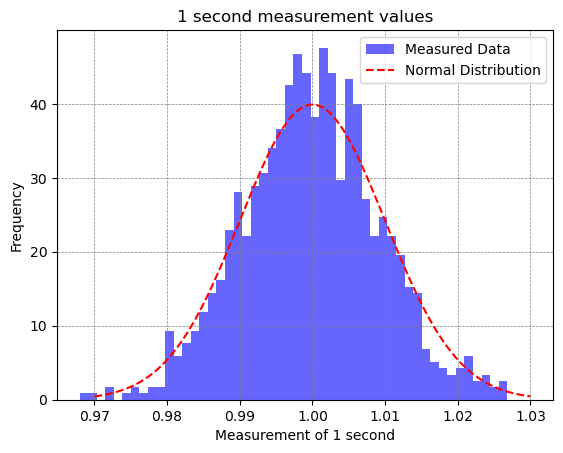

In [70]:
# Plot a histogram of the measurements
plt.hist(sec_measures, bins=50, density=True, alpha=0.6, color="b", label="Measured Data")

# Generate a normal distribution with the same mean and standard deviation
x = np.linspace(0.97, 1.03, 1000)
y = norm.pdf(x, mean, std)
plt.plot(x, y, "r--", label="Normal Distribution")
plt.xlabel("Measurement of 1 second")
plt.ylabel("Frequency")
plt.title("1 second measurement values")
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

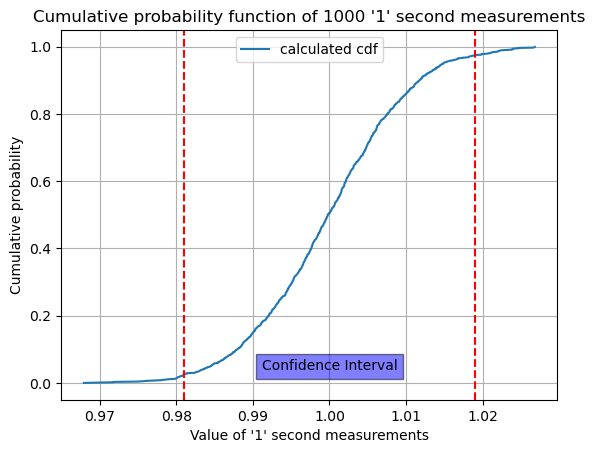

95% Confidence Interval: (0.9810524561614858, 1.0190263775531416)


In [71]:
sec_measures.sort()

# Function to generate the cumulative probability
cumulative_probabilities = []
for i, sec_measure in enumerate(sec_measures):
  cumulative_probabilities.append(float(i) / float(N))

# Theoritical 95% confidence interval calculation
lower_bound = np.percentile(sec_measures, 2.5)
upper_bound = np.percentile(sec_measures, 97.5)

# Plot the cdf
plt.plot(sec_measures, cumulative_probabilities, label = "calculated cdf")
plt.axvline(lower_bound ,ymin=0, ymax=1, linestyle= '--', color = 'red')
plt.axvline(upper_bound, ymin=0, ymax=1, linestyle='--', color ="red")
plt.xlabel("Value of '1' second measurements")
plt.ylabel("Cumulative probability")
plt.title("Cumulative probability function of 1000 '1' second measurements")
plt.grid(True)
plt.legend(loc = "upper center")

confidence_interval_text = f"Confidence Interval"
plt.text((lower_bound + upper_bound) / 2, 0.05, confidence_interval_text,
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='Blue', alpha=0.5))
plt.show()
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

The Confidence interval as deduced from the cumulative frequency graph is $(0.98, 1.02)$, which means that it exactly corresponds to the uncertainity in the measurement of 1 second.

## Q3
"Make" 100 measurements. What is the value of the arithmetical average
(mean in matlab)? Repeat 100 measurements. Is the arithmetical average
the same? 


In [72]:
# Calculated mean and standard deviation
mean = 1
std = 0.01

N = 100            # Number of measurements to make

# Function to generate mean of two different 100 measurements
for i in range(2):
    np.random.seed(i)
    sec_measures = np.random.normal(mean, std, N)
    sec_mean = np.mean(sec_measures)
    print(f'mean = {sec_mean}')

mean = 1.000598080155345
mean = 1.000605828520757


As we can see that the mean is not the same.

## Q4
The arithmetical average is, just as the measurements, a random variable.
To estimate its standard deviation, make 1000 arithmetical averages on
1000 series of 100 measurements. Show the histogram, estimate the
standard deviation (std function) and the confidence interval from these
1000 averages. Conclusion?

In [73]:
avg_means = []            # Array to store the means of 1000 series of 100 measurements of "1" second

# Function to generate 1000 arithematic means of 1000 series of 100 measurements
for i in range(1000):
    np.random.seed(i)
    sec_measures = np.random.normal(mean, std, N)    # for each i, it generates 100 "1" second measurement
    sec_mean = np.mean(sec_measures)                 #  Calculates the mean for each 100 "1" second measurement
    avg_means.append(sec_mean)                       # Store the mean in the array declared outside the function
print(avg_means)

[1.000598080155345, 1.000605828520757, 0.9989625886611739, 0.9989136292559393, 1.0003527357797386, 1.0009154664386777, 1.0010943253336855, 1.0001206542451775, 1.0006161002438867, 0.9998714583045338, 1.0007941666293687, 1.000115182080255, 0.998556925023613, 1.0005840739114686, 0.9982879183203395, 0.9995477167316131, 1.0002107239977431, 1.0011150979424777, 1.001839414811383, 1.0002432356573208, 0.9994547301119028, 1.0010442046065875, 0.9994632459938775, 1.0011068807195387, 1.0010425201748487, 0.9994849903066748, 1.000355538378502, 1.000996572875422, 0.9996116776757903, 1.0002499630291144, 0.9988960783224193, 0.9985346006510833, 1.0006368595578463, 0.9996191082911268, 1.0007082595699475, 1.0005761289988497, 0.9992950525765323, 1.000607595085785, 1.0009732149269621, 1.0002630033154263, 0.9997721018563339, 0.998603483137286, 0.9989615348260592, 1.0006458262947981, 0.9991029367124811, 0.9986082046102719, 0.9993321800993152, 0.9999419883192071, 1.000041529709583, 1.00072862087251, 1.000400411

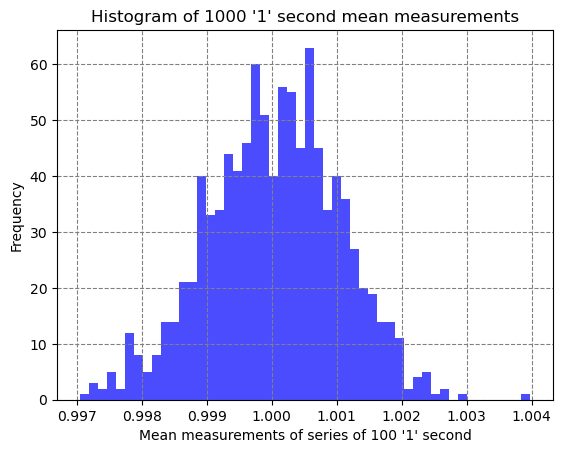

In [74]:
# Plot the histogram of the means 
plt.hist(avg_means, bins = 50, color = "b", alpha = 0.7)
plt.xlabel("Mean measurements of series of 100 '1' second")
plt.ylabel("Frequency")
plt.title("Histogram of 1000 '1' second mean measurements")
plt.grid(color = "grey", linestyle = "--")
plt.show()

In [75]:
# Estimation of standard deviation of the mean measurements
std = np.std(avg_means)
print(f"standard deviation = {std}")

standard deviation = 0.0010165933946005663


The standard deviation in the 1000 mean measurements is 0.001.

In [76]:
avg_means.sort()

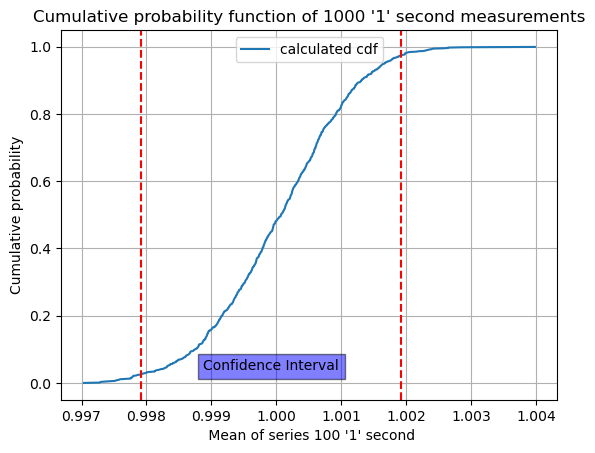

95% Confidence Interval: (0.9979193014816032, 1.0019242064272702)


In [77]:
cumulative_probabilities = []
# Function to calculate the cumulative probability of the means
for i, avg_mean in enumerate(avg_means):
  cumulative_probabilities.append(float(i) /1000)

# 95% confidence interval calculation
lower_bound = np.percentile(avg_means, 2.5)
upper_bound = np.percentile(avg_means, 97.5)

# Plot the cdf 
plt.plot(avg_means, cumulative_probabilities, label = "calculated cdf")
plt.axvline(lower_bound ,ymin=0, ymax=1, linestyle= '--', color = 'red')
plt.axvline(upper_bound, ymin=0, ymax=1, linestyle='--', color ="red")
plt.xlabel(" Mean of series 100 '1' second")
plt.ylabel("Cumulative probability")
plt.title("Cumulative probability function of 1000 '1' second measurements")
plt.grid(True)
plt.legend(loc = "upper center")
confidence_interval_text = f"Confidence Interval"
plt.text((lower_bound + upper_bound) / 2, 0.05, confidence_interval_text,
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='Blue', alpha=0.5))
plt.show()
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

This shows that the arithematic mean itself is a random variable but has a small 95% confidence interval, that means the data is homogenous i.e arithematic mean despite being a random variable does not show significant variation in different measurements which can also be confirmed by the standard deviation measurement of the data (which came out to be 0.001).

### Conclusion


We tried the methods for hypothesis testing and realized the importance of the sample size for either accepting and rejecting the hypothesis, which we saw first hand while testing out the popularity of Mr. Dupont with varying sample sizes. In the later part of the code, we quantified the randomness associated with the statistical variables like mean, which is one of the important variables to check the consistency and the stability of a given data set.